In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-05-22 22:00:51--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.112, 34.64.4.16, 34.64.4.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  11.8MB/s    in 5.5s    

2021-05-22 22:00:58 (11.8 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import zipfile

In [4]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [6]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.480.jpg', 'cat.327.jpg', 'cat.767.jpg', 'cat.689.jpg', 'cat.521.jpg', 'cat.727.jpg', 'cat.560.jpg', 'cat.338.jpg', 'cat.751.jpg', 'cat.968.jpg']
['dog.313.jpg', 'dog.740.jpg', 'dog.915.jpg', 'dog.679.jpg', 'dog.219.jpg', 'dog.859.jpg', 'dog.941.jpg', 'dog.288.jpg', 'dog.162.jpg', 'dog.57.jpg']


In [7]:
print('total training cat images :', len(os.listdir(train_cats_dir)))
print('total training dog images :', len(os.listdir(train_dogs_dir)))

print('total validation cat images :', len(os.listdir(validation_cats_dir)))
print('total validation dog images :', len(os.listdir(validation_dogs_dir)))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [8]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0

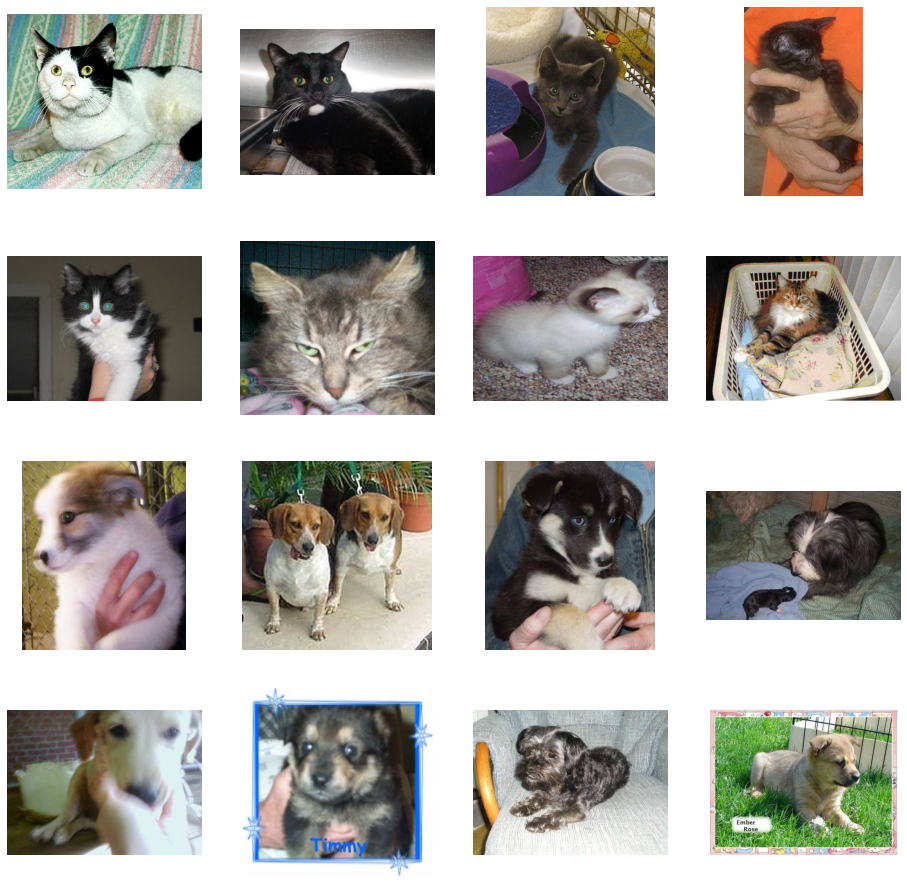

In [9]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [10]:
import tensorflow as tf

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(), 
    
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [13]:
from tensorflow.keras.optimizers import RMSprop

In [14]:
model.compile(
    optimizer = RMSprop(lr = 0.001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [15]:
# Data Preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [17]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 20,
    class_mode = 'binary',
    target_size = (150, 150)
)

Found 2000 images belonging to 2 classes.


In [18]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    batch_size = 20,
    class_mode = 'binary',
    target_size = (150, 150)
)

Found 1000 images belonging to 2 classes.


In [19]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch = 100,
    epochs = 15,
    validation_steps = 50
)

Epoch 1/15
100/100 [==============================] - 12s 116ms/step - loss: 1.0891 - accuracy: 0.5422 - val_loss: 0.6418 - val_accuracy: 0.6900
Epoch 2/15
100/100 [==============================] - 11s 114ms/step - loss: 0.6485 - accuracy: 0.6598 - val_loss: 0.6041 - val_accuracy: 0.6910
Epoch 3/15
100/100 [==============================] - 11s 114ms/step - loss: 0.5588 - accuracy: 0.7287 - val_loss: 0.5877 - val_accuracy: 0.6930
Epoch 4/15
100/100 [==============================] - 12s 115ms/step - loss: 0.4967 - accuracy: 0.7543 - val_loss: 0.5579 - val_accuracy: 0.7220
Epoch 5/15
100/100 [==============================] - 12s 115ms/step - loss: 0.3791 - accuracy: 0.8202 - val_loss: 0.6338 - val_accuracy: 0.7140
Epoch 6/15
100/100 [==============================] - 11s 114ms/step - loss: 0.2752 - accuracy: 0.8825 - val_loss: 0.7432 - val_accuracy: 0.7020
Epoch 7/15
100/100 [==============================] - 11s 113ms/step - loss: 0.1862 - accuracy: 0.9298 - val_loss: 0.7728 - val_ac

In [22]:
# Visualizing Intermediate Representations
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [23]:
successive_outputs = [layer.output for layer in model.layers[1:]]

In [24]:
visualization_model = tf.keras.models.Model(
    inputs = model.input,
    outputs = successive_outputs
)

In [25]:
cat_img_files = [
    os.path.join(train_cats_dir, f) for f in train_cat_fnames
]

In [26]:
dog_img_files = [
    os.path.join(train_dogs_dir, f) for f in train_dog_fnames
]

In [27]:
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size = (150, 150))

In [29]:
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

x /= 255.0

In [30]:
successive_feature_maps = visualization_model.predict(x)

In [31]:
layer_names = [layer.name for layer in model.layers]

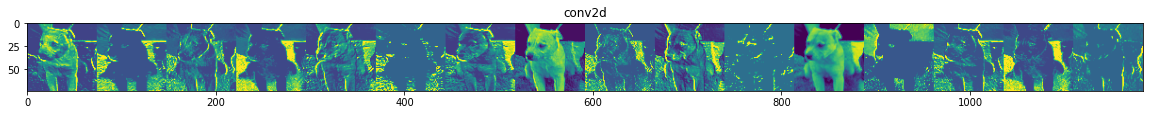

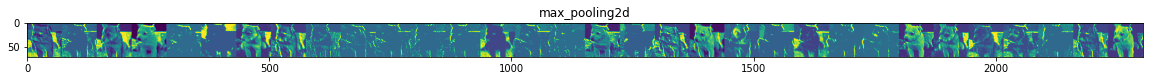

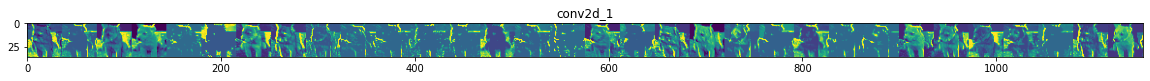

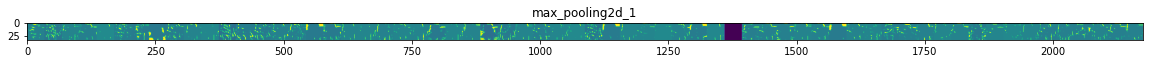

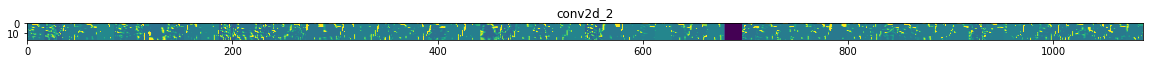

In [34]:
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        
        display_grid = np.zeros((size, size*n_features))
        
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            
            display_grid[:, i*size : (i+1)*size] = x
            
        scale = 20. / n_features
        
        plt.figure( figsize = (scale * n_features, scale) )
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [40]:
# Retrieve a list of list results on training & test data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get n of epochs

<Figure size 432x288 with 0 Axes>

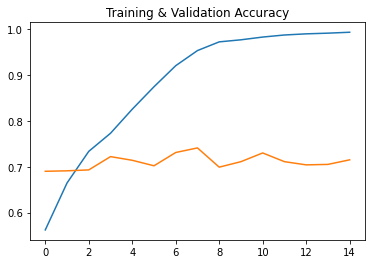

<Figure size 432x288 with 0 Axes>

In [42]:
# Plot training & validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)

plt.title('Training & Validation Accuracy')
plt.figure()

Text(0.5, 1.0, 'Training & Validation Loss')

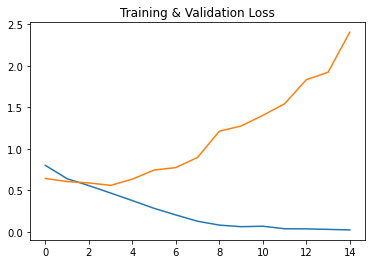

In [43]:
# Plot training & validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training & Validation Loss')